In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_8/'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_8


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 8.1 MB/s 


In [5]:
import mtcnn
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import cv2
from skimage import io
import matplotlib.pyplot as plt

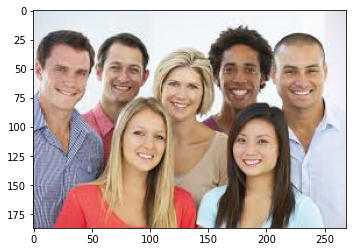

In [16]:
image = io.imread('group_of_people.jpg')
plt.imshow(image)

In [17]:
detector = MTCNN()
result = detector.detect_faces(image)

In [18]:
result

[{'box': [159, 31, 36, 51],
  'confidence': 0.9999665021896362,
  'keypoints': {'left_eye': (169, 51),
   'mouth_left': (167, 68),
   'mouth_right': (186, 68),
   'nose': (177, 61),
   'right_eye': (186, 51)}},
 {'box': [60, 31, 33, 47],
  'confidence': 0.9999501705169678,
  'keypoints': {'left_eye': (70, 49),
   'mouth_left': (68, 64),
   'mouth_right': (85, 66),
   'nose': (78, 60),
   'right_eye': (86, 51)}},
 {'box': [79, 89, 34, 47],
  'confidence': 0.999943733215332,
  'keypoints': {'left_eye': (91, 105),
   'mouth_left': (88, 122),
   'mouth_right': (105, 124),
   'nose': (100, 116),
   'right_eye': (108, 109)}},
 {'box': [9, 32, 38, 50],
  'confidence': 0.9998481273651123,
  'keypoints': {'left_eye': (24, 50),
   'mouth_left': (20, 67),
   'mouth_right': (37, 70),
   'nose': (32, 63),
   'right_eye': (41, 54)}},
 {'box': [112, 49, 33, 43],
  'confidence': 0.9998034834861755,
  'keypoints': {'left_eye': (121, 63),
   'mouth_left': (118, 78),
   'mouth_right': (135, 81),
   'nose

In [19]:
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']
print(bounding_box)
print(keypoints)

[159, 31, 36, 51]
{'left_eye': (169, 51), 'right_eye': (186, 51), 'nose': (177, 61), 'mouth_left': (167, 68), 'mouth_right': (186, 68)}


In [28]:
for person in result:
  bounding_box = person['box']
  keypoints = person['keypoints']
  # vẽ bounding box
  # hình, điểm đầu, điểm cuối, màu sắc, độ dày đường
  cv2.rectangle(image, # hình
                (bounding_box[0], bounding_box[1]),# điểm đầu
                (bounding_box[0] + bounding_box[2],
                bounding_box[1] + bounding_box[3]), # điểm cuối
                (0, 0, 255), 2) # màu sắc, độ dày
  # vẽ box đại diện cho mắt
  # vẽ box: hình, vị trí, màu sắc, độ đậm nét
  w = int(bounding_box[2]/6)
  h = int(bounding_box[3]/10)
  cv2.rectangle(image, (keypoints['left_eye'][0] - w, keypoints['left_eye'][1] - h), 
                (keypoints['left_eye'][0] + w, keypoints['left_eye'][1] + h), (0, 255, 0), 2)
  cv2.rectangle(image, (keypoints['right_eye'][0] - w, keypoints['right_eye'][1] - h), 
                (keypoints['right_eye'][0] + w, keypoints['right_eye'][1] + h), (0, 255, 0), 2)

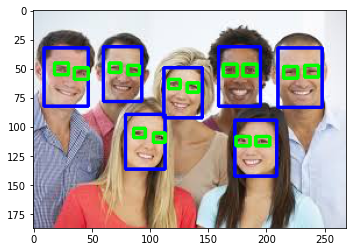

In [29]:
plt.imshow(image)
plt.show()

In [30]:
def detect_faces_eyes(image):
  detector = MTCNN()
  result = detector.detect_faces(image)
  bounding_box = result[0]['box']
  keypoints = result[0]['keypoints']
  for person in result:
    bounding_box = person['box']
    keypoints = person['keypoints']
    # vẽ bounding box
    # hình, điểm đầu, điểm cuối, màu sắc, độ dày đường
    cv2.rectangle(image, # hình
                  (bounding_box[0], bounding_box[1]),# điểm đầu
                  (bounding_box[0] + bounding_box[2],
                  bounding_box[1] + bounding_box[3]), # điểm cuối
                  (0, 0, 255), 1) # màu sắc, độ dày
    # vẽ box đại diện cho mắt
    # vẽ: hình, điểm đầu, điểm cuối, màu sắc, độ đậm nét
    w = int(bounding_box[2]/6)
    h = int(bounding_box[3]/10)
    cv2.rectangle(image, (keypoints['left_eye'][0] - w, keypoints['left_eye'][1] - h), 
                  (keypoints['left_eye'][0] + w, keypoints['left_eye'][1] + h), (0, 255, 0), 2)
    cv2.rectangle(image, (keypoints['right_eye'][0] - w, keypoints['right_eye'][1] - h), 
                  (keypoints['right_eye'][0] + w, keypoints['right_eye'][1] + h), (0, 255, 0), 2)
  plt.imshow(image)
  plt.show()

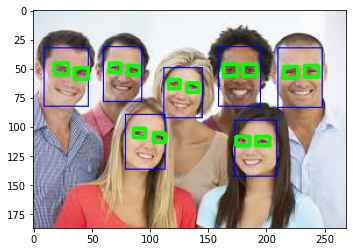

In [31]:
detect_faces_eyes(io.imread('group_of_people.jpg'))

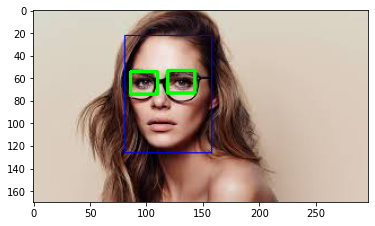

In [32]:
detect_faces_eyes(io.imread('face_glasses_1.jpg'))

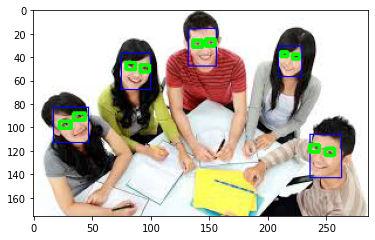

In [33]:
detect_faces_eyes(io.imread('test.jpg'))